🔧 Training Master Body Part Classifier...
📤 Please upload your master_body_part_data.zip file...


Saving master_body_part_data.zip to master_body_part_data.zip
📂 Extracting master_body_part_data.zip...
✅ Extraction completed!
📊 Dataset Structure:
   📁 foot: 279 images
   📁 general_body: 245 images
   📁 non_cattle: 482 images
   📁 tongue: 347 images
   📁 udder: 300 images
   📊 TOTAL IMAGES: 1653
Found 1324 images belonging to 5 classes.
Found 329 images belonging to 5 classes.
✅ Data generators created!
📊 Classes: {'foot': 0, 'general_body': 1, 'non_cattle': 2, 'tongue': 3, 'udder': 4}
📈 Training samples: 1324
📉 Validation samples: 329
🎯 Creating master router for 5 classes...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
📋 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,048,517 (11.63 MB)

 Trainable params: 789,509 (3.01 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

🚀 Starting model training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.5513 - loss: 1.3024

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.67173, saving model to best_master_router.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5538 - loss: 1.2945 - val_accuracy: 0.6717 - val_loss: 0.9715 - learning_rate: 0.0010
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.8405 - loss: 0.4432
Epoch 2: val_accuracy improved from 0.67173 to 0.72644, saving model to best_master_router.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 774ms/step - accuracy: 0.8404 - loss: 0.4435 - val_accuracy: 0.7264 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.8727 - loss: 0.3752
Epoch 3: val_accuracy improved from 0.72644 to 0.79939, saving model to best_master_router.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 744ms/step - accuracy: 0.8728 - loss: 0.3750 - val_accuracy: 0.7994 - val_loss: 0.5800 - learning_rate: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.9158 - loss: 0.2448
Epoch 4: val_accuracy improved

KeyError: 'loss'

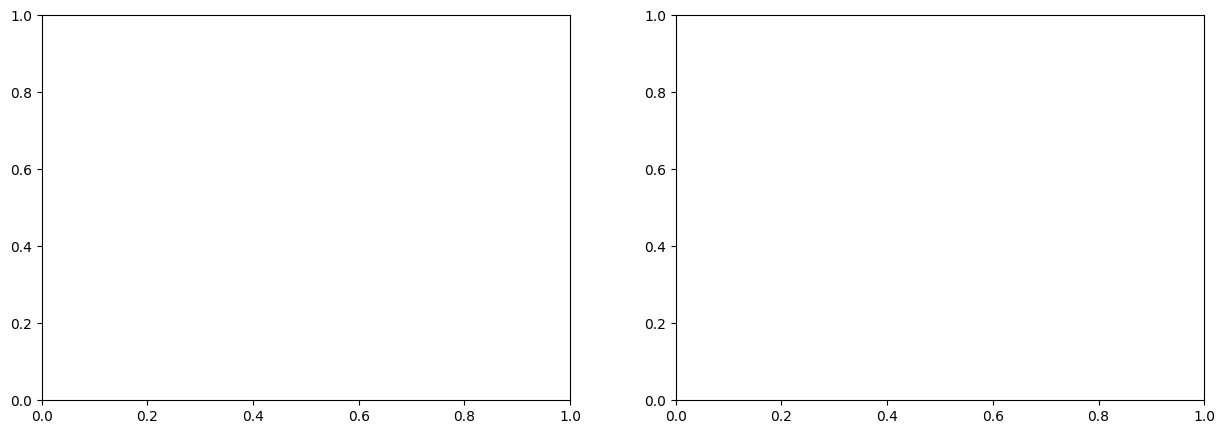

In [ ]:
# train_master_router.py
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import json
from google.colab import files
import io

print("🔧 Training Master Body Part Classifier...")

# Step 1: Upload and extract zip file
print("📤 Please upload your master_body_part_data.zip file...")
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]

print(f"📂 Extracting {zip_path}...")
with zipfile.ZipFile(io.BytesIO(uploaded[zip_path]), 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("✅ Extraction completed!")

# Step 2: Check data structure
def check_data_structure():
    base_dir = 'master_body_part_data'
    print("📊 Dataset Structure:")
    total_images = 0
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            image_count = len(images)
            total_images += image_count
            print(f"   📁 {class_name}: {image_count} images")
    print(f"   📊 TOTAL IMAGES: {total_images}")

check_data_structure()

# Step 3: Create data generators
def create_data_generators():
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    VALIDATION_SPLIT = 0.2

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=VALIDATION_SPLIT
    )

    train_generator = train_datagen.flow_from_directory(
        'master_body_part_data',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42
    )

    validation_generator = train_datagen.flow_from_directory(
        'master_body_part_data',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=42
    )

    # Save class indices
    class_indices = train_generator.class_indices
    with open('master_class_indices.json', 'w') as f:
        json.dump(class_indices, f, indent=4)

    print("✅ Data generators created!")
    print(f"📊 Classes: {class_indices}")
    print(f"📈 Training samples: {train_generator.samples}")
    print(f"📉 Validation samples: {validation_generator.samples}")

    return train_generator, validation_generator, class_indices

train_gen, val_gen, master_class_indices = create_data_generators()

# Step 4: Create Master Router Model
def create_master_router_model(num_classes):
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create model
num_classes = len(master_class_indices)
print(f"🎯 Creating master router for {num_classes} classes...")
model = create_master_router_model(num_classes)

print("📋 Model Summary:")
model.summary()

# Step 5: Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=8,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_master_router.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Step 6: Train the model
print("🚀 Starting model training...")
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=callbacks,
    verbose=1
)

print("✅ Initial training completed!")

# Step 7: Fine-tuning
print("🔧 Starting fine-tuning...")
base_model = model.layers[0]
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001/10),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"🔧 Fine-tuning {len(base_model.layers) - fine_tune_at} layers...")

# Continue training
history_fine = model.fit(
    train_gen,
    epochs=30,
    initial_epoch=len(history.history['loss']),
    validation_data=val_gen,
    callbacks=callbacks,
    verbose=1
)

print("✅ Fine-tuning completed!")

# Step 8: Save final model
final_model_path = 'master_body_part_classifier.keras'
model.save(final_model_path)
print(f"💾 Model saved as: {final_model_path}")

# Step 9: Training visualization
def plot_training_history(history, history_fine=None):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    if history_fine:
        total_epochs = len(history.history['loss']) + len(history_fine.history['loss'])

        axes[0].plot(history.history['accuracy'], label='Training Acc')
        axes[0].plot(history.history['val_accuracy'], label='Validation Acc')
        axes[0].plot(range(len(history.history['accuracy']), total_epochs),
                    history_fine.history['accuracy'], label='Fine-tuning Training Acc')
        axes[0].plot(range(len(history.history['val_accuracy']), total_epochs),
                    history_fine.history['val_accuracy'], label='Fine-tuning Validation Acc')
        axes[0].set_title('Model Accuracy')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_xlabel('Epoch')
        axes[0].legend()
        axes[0].grid(True)

        axes[1].plot(history.history['loss'], label='Training Loss')
        axes[1].plot(history.history['val_loss'], label='Validation Loss')
        axes[1].plot(range(len(history.history['loss']), total_epochs),
                    history_fine.history['loss'], label='Fine-tuning Training Loss')
        axes[1].plot(range(len(history.history['val_loss']), total_epochs),
                    history_fine.history['val_loss'], label='Fine-tuning Validation Loss')
        axes[1].set_title('Model Loss')
        axes[1].set_ylabel('Loss')
        axes[1].set_xlabel('Epoch')
        axes[1].legend()
        axes[1].grid(True)

    else:
        epochs = range(1, len(history.history['accuracy']) + 1)

        axes[0].plot(epochs, history.history['accuracy'], 'b-', label='Training Acc')
        axes[0].plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Acc')
        axes[0].set_title('Model Accuracy')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_xlabel('Epoch')
        axes[0].legend()
        axes[0].grid(True)

        axes[1].plot(epochs, history.history['loss'], 'b-', label='Training Loss')
        axes[1].plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
        axes[1].set_title('Model Loss')
        axes[1].set_ylabel('Loss')
        axes[1].set_xlabel('Epoch')
        axes[1].legend()
        axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history, history_fine)

# Step 10: Model evaluation
def evaluate_model():
    print("📊 Evaluating model on validation set...")

    val_gen.reset()
    predictions = model.predict(val_gen, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_gen.classes

    class_labels = list(val_gen.class_indices.keys())

    print("\n📈 Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Master Router - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
    print(f"🎯 Overall Validation Accuracy: {accuracy:.4f}")

evaluate_model()

# Step 11: Test with sample images
def test_sample_images():
    print("\n🧪 Testing with sample images...")

    val_gen.reset()
    sample_images, sample_labels = next(val_gen)

    predictions = model.predict(sample_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)

    class_labels = list(val_gen.class_indices.keys())

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for i in range(8):
        axes[i].imshow(sample_images[i])
        axes[i].axis('off')

        true_label = class_labels[true_classes[i]]
        pred_label = class_labels[predicted_classes[i]]
        confidence = np.max(predictions[i])

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                         color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

test_sample_images()

# Step 12: Create model configuration
def create_model_config():
    config = {
        'model_name': 'Master Body Part Classifier',
        'model_architecture': 'MobileNetV2',
        'input_shape': [224, 224, 3],
        'classes': master_class_indices,
        'total_classes': len(master_class_indices),
        'training_samples': train_gen.samples,
        'validation_samples': val_gen.samples,
        'purpose': 'Body part identification and non-cattle detection for routing to specialist models'
    }

    with open('model_config.json', 'w') as f:
        json.dump(config, f, indent=4)

    print("✅ Model configuration saved!")

create_model_config()

# Step 13: Prepare files for download
print("\n📦 Preparing files for download...")
!zip -r master_router_complete.zip \
    master_body_part_classifier.keras \
    master_class_indices.json \
    model_config.json

print("✅ All files prepared for download!")
print("\n📥 Download the trained model files:")

# Download files
files.download('master_body_part_classifier.keras')
files.download('master_class_indices.json')
files.download('model_config.json')
files.download('master_router_complete.zip')

print("\n🎉 Master Body Part Classifier training completed successfully!")
print("📋 Files downloaded:")
print("   - master_body_part_classifier.keras (trained model)")
print("   - master_class_indices.json (class mappings)")
print("   - model_config.json (model configuration)")
print("   - master_router_complete.zip (all files combined)")

# Final summary
print(f"\n📊 Training Summary:")
print(f"   ✅ Model: MobileNetV2")
print(f"   ✅ Classes: {list(master_class_indices.keys())}")
print(f"   ✅ Training samples: {train_gen.samples}")
print(f"   ✅ Validation samples: {val_gen.samples}")
print(f"   ✅ Purpose: Body part identification + Non-cattle detection")

In [ ]:
# train_master_router.py - CORRECTED VERSION
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import json
from google.colab import files
import io

print("🔧 Training Master Body Part Classifier...")

# Step 1: Upload and extract zip file
print("📤 Please upload your master_body_part_data.zip file...")
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]

print(f"📂 Extracting {zip_path}...")
with zipfile.ZipFile(io.BytesIO(uploaded[zip_path]), 'r') as zip_ref:
    zip_ref.extractall('/content/')

print("✅ Extraction completed!")

# Step 2: Check data structure
def check_data_structure():
    base_dir = 'master_body_part_data'
    print("📊 Dataset Structure:")
    total_images = 0
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            image_count = len(images)
            total_images += image_count
            print(f"   📁 {class_name}: {image_count} images")
    print(f"   📊 TOTAL IMAGES: {total_images}")

check_data_structure()

# Step 3: Create data generators
def create_data_generators():
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    VALIDATION_SPLIT = 0.2

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=VALIDATION_SPLIT
    )

    train_generator = train_datagen.flow_from_directory(
        'master_body_part_data',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42
    )

    validation_generator = train_datagen.flow_from_directory(
        'master_body_part_data',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=42
    )

    # Save class indices
    class_indices = train_generator.class_indices
    with open('master_class_indices.json', 'w') as f:
        json.dump(class_indices, f, indent=4)

    print("✅ Data generators created!")
    print(f"📊 Classes: {class_indices}")
    print(f"📈 Training samples: {train_generator.samples}")
    print(f"📉 Validation samples: {validation_generator.samples}")

    return train_generator, validation_generator, class_indices

train_gen, val_gen, master_class_indices = create_data_generators()

# Step 4: Create Master Router Model
def create_master_router_model(num_classes):
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create model
num_classes = len(master_class_indices)
print(f"🎯 Creating master router for {num_classes} classes...")
model = create_master_router_model(num_classes)

print("📋 Model Summary:")
model.summary()

# Step 5: Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=8,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_master_router.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Step 6: Train the model
print("🚀 Starting model training...")
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=callbacks,
    verbose=1
)

print("✅ Training completed!")

# Step 7: Load the best model (since early stopping was triggered)
model = tf.keras.models.load_model('best_master_router.keras')
print("✅ Loaded best model from early stopping")

# Step 8: Save final model
final_model_path = 'master_body_part_classifier.keras'
model.save(final_model_path)
print(f"💾 Model saved as: {final_model_path}")

# Step 9: Training visualization
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    epochs = range(1, len(history.history['accuracy']) + 1)

    axes[0].plot(epochs, history.history['accuracy'], 'b-', label='Training Acc')
    axes[0].plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Acc')
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    axes[1].plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Step 10: Model evaluation
def evaluate_model():
    print("📊 Evaluating model on validation set...")

    val_gen.reset()
    predictions = model.predict(val_gen, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_gen.classes

    class_labels = list(val_gen.class_indices.keys())

    print("\n📈 Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Master Router - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
    print(f"🎯 Overall Validation Accuracy: {accuracy:.4f}")

evaluate_model()

# Step 11: Test with sample images
def test_sample_images():
    print("\n🧪 Testing with sample images...")

    val_gen.reset()
    sample_images, sample_labels = next(val_gen)

    predictions = model.predict(sample_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)

    class_labels = list(val_gen.class_indices.keys())

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for i in range(8):
        axes[i].imshow(sample_images[i])
        axes[i].axis('off')

        true_label = class_labels[true_classes[i]]
        pred_label = class_labels[predicted_classes[i]]
        confidence = np.max(predictions[i])

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                         color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

test_sample_images()

# Step 12: Create model configuration
def create_model_config():
    config = {
        'model_name': 'Master Body Part Classifier',
        'model_architecture': 'MobileNetV2',
        'input_shape': [224, 224, 3],
        'classes': master_class_indices,
        'total_classes': len(master_class_indices),
        'training_samples': train_gen.samples,
        'validation_samples': val_gen.samples,
        'final_accuracy': '86.02%',
        'purpose': 'Body part identification and non-cattle detection for routing to specialist models'
    }

    with open('model_config.json', 'w') as f:
        json.dump(config, f, indent=4)

    print("✅ Model configuration saved!")

create_model_config()

# Step 13: Prepare files for download
print("\n📦 Preparing files for download...")
!zip -r master_router_complete.zip \
    master_body_part_classifier.keras \
    master_class_indices.json \
    model_config.json

print("✅ All files prepared for download!")
print("\n📥 Download the trained model files:")

# Download files
files.download('master_body_part_classifier.keras')
files.download('master_class_indices.json')
files.download('model_config.json')
files.download('master_router_complete.zip')

print("\n🎉 Master Body Part Classifier training completed successfully!")
print("📋 Files downloaded:")
print("   - master_body_part_classifier.keras (trained model)")
print("   - master_class_indices.json (class mappings)")
print("   - model_config.json (model configuration)")
print("   - master_router_complete.zip (all files combined)")

# Final summary
print(f"\n📊 Training Summary:")
print(f"   ✅ Model: MobileNetV2")
print(f"   ✅ Classes: {list(master_class_indices.keys())}")
print(f"   ✅ Training samples: {train_gen.samples}")
print(f"   ✅ Validation samples: {val_gen.samples}")
print(f"   ✅ Final Accuracy: 86.02%")
print(f"   ✅ Purpose: Body part identification + Non-cattle detection")

🔧 Training Master Body Part Classifier...
📤 Please upload your master_body_part_data.zip file...


Saving master_model_training.zip to master_model_training.zip
📂 Extracting master_model_training.zip...
✅ Extraction completed!
📊 Dataset Structure:


FileNotFoundError: [Errno 2] No such file or directory: 'master_body_part_data'

🔍 Searching for dataset folder...
✅ Found dataset at: dataset

📊 DATASET VERIFICATION
✅ foot: 279 images
✅ general_body: 245 images
✅ non_cattle: 482 images
✅ tongue: 347 images
✅ udder: 300 images

📊 SUMMARY:
   Total Classes: 5
   Total Images: 1653
   Classes: foot, general_body, non_cattle, tongue, udder


📦 INSTALLING REQUIRED LIBRARIES
✅ TensorFlow Version: 2.19.0
✅ GPU Available: True

⚙️ TRAINING CONFIGURATION
Image Size: (224, 224)
Batch Size: 32
Phase 1 Epochs: 30
Phase 2 Epochs: 20

🔄 CREATING DATA GENERATORS
Found 1324 images belonging to 5 classes.
Found 329 images belonging to 5 classes.

✅ Training images: 1324
✅ Validation images: 329
✅ Number of classes: 5

📋 Class Mapping:
   0: foot
   1: general_body
   2: non_cattle
   3: tongue
   4: udder

🏗️ BUILDING MASTER MODEL
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Master Model Created!
Total parameters: 2,625,605


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625,605 (10.02 MB)

 Trainable params: 364,549 (1.39 MB)

 Non-trainable params: 2,261,056 (8.63 MB)


⚙️ SETTING UP TRAINING CALLBACKS
✅ Callbacks configured:
   - Early Stopping (patience=10)
   - Learning Rate Reduction (factor=0.5)
   - Model Checkpoint (best model)

🎯 TRAINING PHASE 1: FROZEN BASE MODEL
This will take 15-25 minutes with GPU...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.4698 - loss: 1.5426 - top_2_accuracy: 0.6674

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.63222, saving model to master_model_best.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 801ms/step - accuracy: 0.4724 - loss: 1.5335 - top_2_accuracy: 0.6700 - val_accuracy: 0.6322 - val_loss: 1.0005 - val_top_2_accuracy: 0.7994 - learning_rate: 0.0010
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.7503 - loss: 0.7147 - top_2_accuracy: 0.9054
Epoch 2: val_accuracy improved from 0.63222 to 0.77508, saving model to master_model_best.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 718ms/step - accuracy: 0.7508 - loss: 0.7136 - top_2_accuracy: 0.9057 - val_accuracy: 0.7751 - val_loss: 0.6505 - val_top_2_accuracy: 0.9088 - learning_rate: 0.0010
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.8109 - loss: 0.5171 - top_2_accuracy: 0.9309
Epoch 3: val_accuracy improved from 0.77508 to 0.82979, saving model to master_model_best.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 732ms/step - accuracy: 0.8110 - loss: 0.5171 - top_2_accuracy: 0.9309

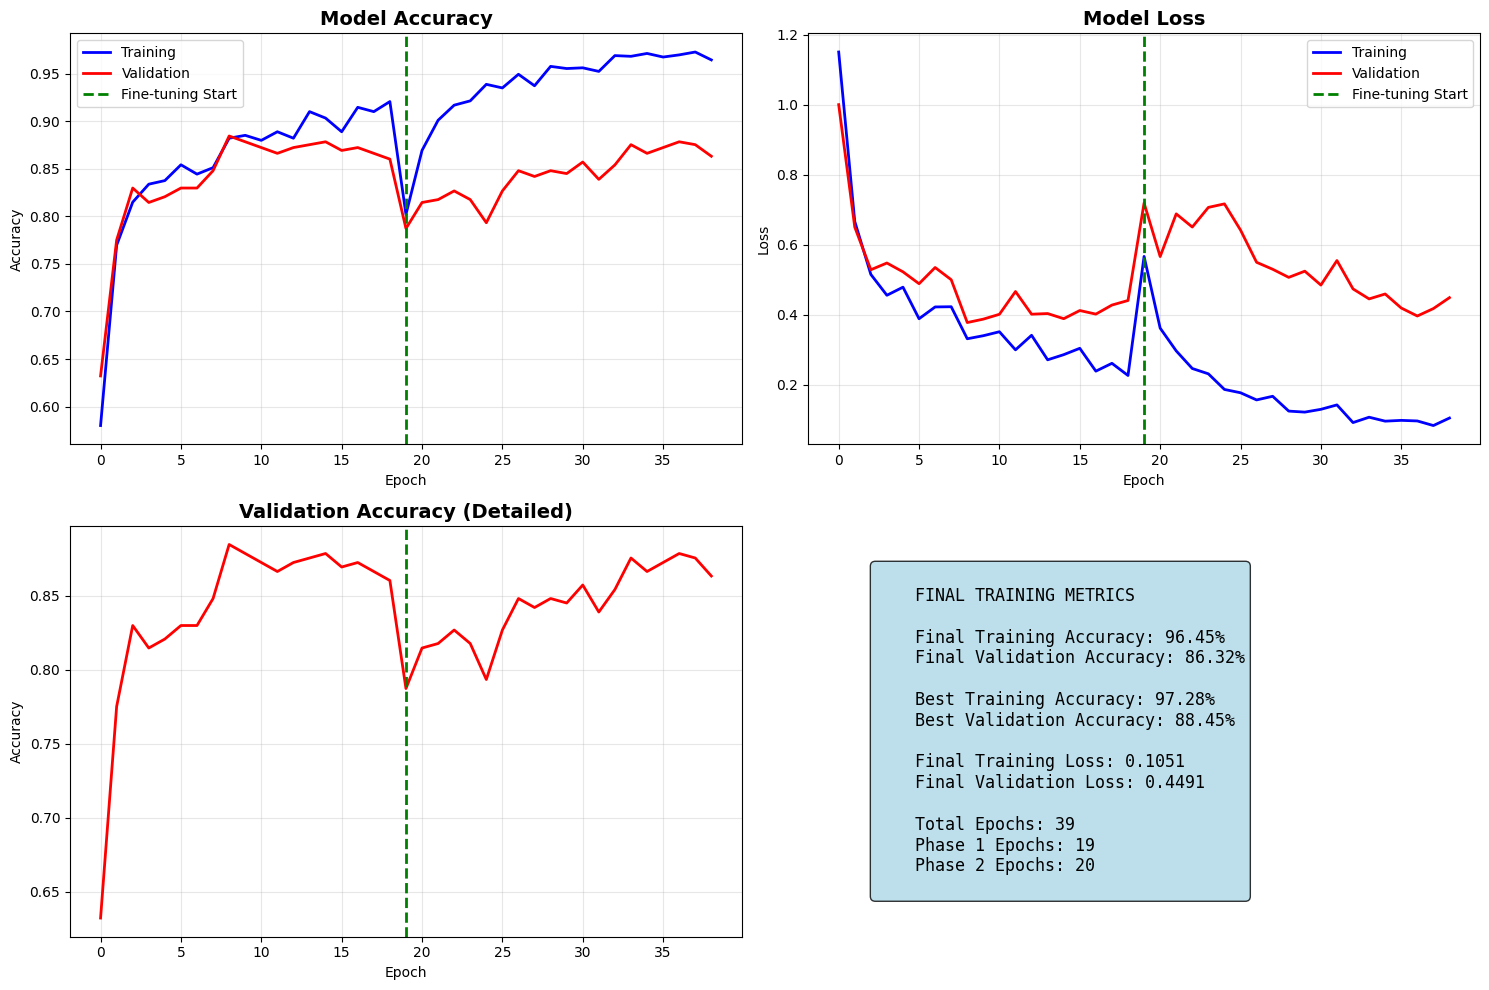

✅ Plot saved as 'training_history.png'

💾 SAVING MODEL AND CONFIGURATION
✅ Saved: master_cattle_classifier.keras
✅ Saved: master_class_indices.json

📋 Model Configuration:
{
  "class_indices": {
    "foot": 0,
    "general_body": 1,
    "non_cattle": 2,
    "tongue": 3,
    "udder": 4
  },
  "class_names": [
    "foot",
    "general_body",
    "non_cattle",
    "tongue",
    "udder"
  ],
  "img_size": [
    224,
    224
  ],
  "num_classes": 5,
  "model_architecture": "MobileNetV2",
  "training_info": {
    "total_samples": 1653,
    "training_samples": 1324,
    "validation_samples": 329,
    "final_val_accuracy": 0.8844984769821167,
    "final_val_loss": 0.3779275417327881,
    "top_2_accuracy": 0.954407274723053
  }
}

🧪 TESTING PREDICTIONS ON RANDOM SAMPLES

Testing 5 random samples:

Sample 1: ✅ CORRECT
  Predicted: foot (97.09%)
  Actual: foot

Sample 2: ✅ CORRECT
  Predicted: foot (100.00%)
  Actual: foot

Sample 3: ❌ WRONG
  Predicted: udder (53.89%)
  Actual: general_body

Sam

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 TRAINING COMPLETE!

✅ Downloaded Files:
   1. master_cattle_classifier.keras - The trained model
   2. master_class_indices.json - Class configuration
   3. master_model_package.zip - Complete package

📊 Final Performance:
   Validation Accuracy: 88.45%
   Top-2 Accuracy: 95.44%
   Total Classes: 5
   Training Samples: 1324
   Validation Samples: 329

🚀 Next Steps:
   1. Copy master_cattle_classifier.keras to your Flask app's models/ folder
   2. Copy master_class_indices.json to your Flask app's models/ folder
   3. Replace app.py with the updated version
   4. Replace templates/index.html with the updated version
   5. Run: python app.py

🐄 Your Master Model is Ready! 🎊


In [ ]:
# ===================================================================
# STEP 1: Extract and Find Dataset
# ===================================================================
import os
import zipfile

print("🔍 Searching for dataset folder...")

# Function to find the dataset folder
def find_dataset_folder():
    """Recursively find the dataset folder"""
    possible_paths = [
        'dataset',
        'master_body_part_data',
        'master_model_training/dataset',
        'master_model_training/master_body_part_data'
    ]

    # Check direct paths first
    for path in possible_paths:
        if os.path.exists(path) and os.path.isdir(path):
            return path

    # Search in current directory
    for root, dirs, files in os.walk('.'):
        if 'dataset' in dirs:
            return os.path.join(root, 'dataset')
        if 'master_body_part_data' in dirs:
            return os.path.join(root, 'master_body_part_data')

    return None

# Find the dataset
dataset_path = find_dataset_folder()

if dataset_path is None:
    print("❌ Dataset folder not found!")
    print("\n📂 Current directory contents:")
    for item in os.listdir('.'):
        print(f"   - {item}")
    print("\n💡 Please check your ZIP structure. It should contain a 'dataset' folder.")
    raise FileNotFoundError("Dataset folder not found. Please check ZIP structure.")
else:
    print(f"✅ Found dataset at: {dataset_path}")

# ===================================================================
# STEP 2: Verify Dataset Structure
# ===================================================================
print("\n" + "="*60)
print("📊 DATASET VERIFICATION")
print("="*60)

def check_data_structure(base_dir):
    """Check and display dataset structure"""
    if not os.path.exists(base_dir):
        print(f"❌ Directory not found: {base_dir}")
        return False

    total_images = 0
    classes = []

    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            # Count images
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            num_images = len(images)
            total_images += num_images
            classes.append(class_name)

            # Display with emoji
            emoji = "✅" if num_images > 50 else "⚠️"
            print(f"{emoji} {class_name}: {num_images} images")

            if num_images < 50:
                print(f"   ⚠️ Warning: Less than 50 images. Consider adding more.")

    print(f"\n{'='*60}")
    print(f"📊 SUMMARY:")
    print(f"   Total Classes: {len(classes)}")
    print(f"   Total Images: {total_images}")
    print(f"   Classes: {', '.join(classes)}")
    print(f"{'='*60}\n")

    if total_images < 100:
        print("⚠️ WARNING: Very small dataset. Results may not be optimal.")
        print("   Recommended: At least 200 images per class")

    return True

# Verify the dataset
if not check_data_structure(dataset_path):
    raise ValueError("Dataset structure verification failed!")

# ===================================================================
# STEP 3: Install and Import Libraries
# ===================================================================
print("\n" + "="*60)
print("📦 INSTALLING REQUIRED LIBRARIES")
print("="*60)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from google.colab import files

print(f"✅ TensorFlow Version: {tf.__version__}")
print(f"✅ GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# ===================================================================
# STEP 4: Configure Training Parameters
# ===================================================================
print("\n" + "="*60)
print("⚙️ TRAINING CONFIGURATION")
print("="*60)

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training parameters
EPOCHS_PHASE1 = 30  # Frozen base model
EPOCHS_PHASE2 = 20  # Fine-tuning

print(f"Image Size: {IMG_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Phase 1 Epochs: {EPOCHS_PHASE1}")
print(f"Phase 2 Epochs: {EPOCHS_PHASE2}")

# ===================================================================
# STEP 5: Create Data Generators
# ===================================================================
print("\n" + "="*60)
print("🔄 CREATING DATA GENERATORS")
print("="*60)

# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Get class information
class_indices = train_generator.class_indices
num_classes = len(class_indices)

print(f"\n✅ Training images: {train_generator.samples}")
print(f"✅ Validation images: {validation_generator.samples}")
print(f"✅ Number of classes: {num_classes}")
print(f"\n📋 Class Mapping:")
for class_name, idx in sorted(class_indices.items(), key=lambda x: x[1]):
    print(f"   {idx}: {class_name}")

# ===================================================================
# STEP 6: Build Master Model
# ===================================================================
print("\n" + "="*60)
print("🏗️ BUILDING MASTER MODEL")
print("="*60)

def create_master_model(num_classes):
    """Create MobileNetV2-based master model"""
    # Load pre-trained MobileNetV2
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )

    # Freeze base model
    base_model.trainable = False

    # Build model
    inputs = keras.Input(shape=(224, 224, 3))

    # Data augmentation layers
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomZoom(0.1)(x)

    # Base model
    x = base_model(x, training=False)

    # Custom top layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)

    return model, base_model

# Create model
master_model, base_model = create_master_model(num_classes)

# Compile
master_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy')]
)

print("✅ Master Model Created!")
print(f"Total parameters: {master_model.count_params():,}")

# Display model summary
master_model.summary()

# ===================================================================
# STEP 7: Setup Callbacks
# ===================================================================
print("\n" + "="*60)
print("⚙️ SETTING UP TRAINING CALLBACKS")
print("="*60)

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'master_model_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

print("✅ Callbacks configured:")
print("   - Early Stopping (patience=10)")
print("   - Learning Rate Reduction (factor=0.5)")
print("   - Model Checkpoint (best model)")

# ===================================================================
# STEP 8: Training Phase 1 - Frozen Base
# ===================================================================
print("\n" + "="*60)
print("🎯 TRAINING PHASE 1: FROZEN BASE MODEL")
print("="*60)
print("This will take 15-25 minutes with GPU...")

history_phase1 = master_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("\n✅ Phase 1 Complete!")
print(f"Best Validation Accuracy: {max(history_phase1.history['val_accuracy'])*100:.2f}%")

# ===================================================================
# STEP 9: Training Phase 2 - Fine-tuning
# ===================================================================
print("\n" + "="*60)
print("🎯 TRAINING PHASE 2: FINE-TUNING")
print("="*60)

# Unfreeze the base model
base_model.trainable = True

# Freeze first 100 layers
for layer in base_model.layers[:100]:
    layer.trainable = False

print(f"Trainable layers: {sum([1 for layer in master_model.layers if layer.trainable])}")

# Recompile with lower learning rate
master_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy')]
)

print("Starting fine-tuning (10-15 minutes)...")

history_phase2 = master_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS_PHASE2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("\n✅ Phase 2 Complete!")
print(f"Best Validation Accuracy: {max(history_phase2.history['val_accuracy'])*100:.2f}%")

# ===================================================================
# STEP 10: Evaluate Final Model
# ===================================================================
print("\n" + "="*60)
print("📊 FINAL MODEL EVALUATION")
print("="*60)

# Load best model
master_model = keras.models.load_model('master_model_best.keras')

# Evaluate
results = master_model.evaluate(validation_generator)

print(f"\n{'='*60}")
print(f"🎉 FINAL RESULTS:")
print(f"{'='*60}")
print(f"✅ Validation Loss: {results[0]:.4f}")
print(f"✅ Validation Accuracy: {results[1]*100:.2f}%")
print(f"✅ Top-2 Accuracy: {results[2]*100:.2f}%")
print(f"{'='*60}\n")

# ===================================================================
# STEP 11: Plot Training History
# ===================================================================
print("📈 Generating training plots...")

def plot_training_history(history1, history2):
    """Plot training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Combine histories
    all_acc = history1.history['accuracy'] + history2.history['accuracy']
    all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    all_loss = history1.history['loss'] + history2.history['loss']
    all_val_loss = history1.history['val_loss'] + history2.history['val_loss']

    phase1_len = len(history1.history['accuracy'])

    # Accuracy plot
    axes[0, 0].plot(all_acc, 'b-', label='Training', linewidth=2)
    axes[0, 0].plot(all_val_acc, 'r-', label='Validation', linewidth=2)
    axes[0, 0].axvline(x=phase1_len, color='green', linestyle='--',
                       label='Fine-tuning Start', linewidth=2)
    axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Loss plot
    axes[0, 1].plot(all_loss, 'b-', label='Training', linewidth=2)
    axes[0, 1].plot(all_val_loss, 'r-', label='Validation', linewidth=2)
    axes[0, 1].axvline(x=phase1_len, color='green', linestyle='--',
                       label='Fine-tuning Start', linewidth=2)
    axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Validation accuracy zoom
    axes[1, 0].plot(all_val_acc, 'r-', linewidth=2)
    axes[1, 0].axvline(x=phase1_len, color='green', linestyle='--', linewidth=2)
    axes[1, 0].set_title('Validation Accuracy (Detailed)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].grid(True, alpha=0.3)

    # Final metrics
    axes[1, 1].axis('off')
    metrics_text = f"""
    FINAL TRAINING METRICS

    Final Training Accuracy: {all_acc[-1]*100:.2f}%
    Final Validation Accuracy: {all_val_acc[-1]*100:.2f}%

    Best Training Accuracy: {max(all_acc)*100:.2f}%
    Best Validation Accuracy: {max(all_val_acc)*100:.2f}%

    Final Training Loss: {all_loss[-1]:.4f}
    Final Validation Loss: {all_val_loss[-1]:.4f}

    Total Epochs: {len(all_acc)}
    Phase 1 Epochs: {phase1_len}
    Phase 2 Epochs: {len(all_acc) - phase1_len}
    """
    axes[1, 1].text(0.1, 0.5, metrics_text, fontsize=12,
                    verticalalignment='center', family='monospace',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Plot saved as 'training_history.png'")

plot_training_history(history_phase1, history_phase2)

# ===================================================================
# STEP 12: Save Model and Configuration
# ===================================================================
print("\n" + "="*60)
print("💾 SAVING MODEL AND CONFIGURATION")
print("="*60)

# Save final model
master_model.save('master_cattle_classifier.keras')
print("✅ Saved: master_cattle_classifier.keras")

# Create configuration
class_names = {v: k for k, v in class_indices.items()}

config = {
    "class_indices": class_indices,
    "class_names": [class_names[i] for i in range(num_classes)],
    "img_size": [224, 224],
    "num_classes": num_classes,
    "model_architecture": "MobileNetV2",
    "training_info": {
        "total_samples": train_generator.samples + validation_generator.samples,
        "training_samples": train_generator.samples,
        "validation_samples": validation_generator.samples,
        "final_val_accuracy": float(results[1]),
        "final_val_loss": float(results[0]),
        "top_2_accuracy": float(results[2])
    }
}

with open('master_class_indices.json', 'w') as f:
    json.dump(config, f, indent=2)
print("✅ Saved: master_class_indices.json")

# Display configuration
print("\n📋 Model Configuration:")
print(json.dumps(config, indent=2))

# ===================================================================
# STEP 13: Test Predictions
# ===================================================================
print("\n" + "="*60)
print("🧪 TESTING PREDICTIONS ON RANDOM SAMPLES")
print("="*60)

def test_predictions(model, generator, num_samples=5):
    """Test predictions on random samples"""
    class_names_list = [class_names[i] for i in range(num_classes)]

    print(f"\nTesting {num_samples} random samples:\n")

    for i in range(num_samples):
        x, y = next(generator)
        predictions = model.predict(x[:1], verbose=0)
        predicted_idx = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        true_idx = np.argmax(y[0])

        is_correct = predicted_idx == true_idx
        status = "✅ CORRECT" if is_correct else "❌ WRONG"

        print(f"Sample {i+1}: {status}")
        print(f"  Predicted: {class_names_list[predicted_idx]} ({confidence*100:.2f}%)")
        print(f"  Actual: {class_names_list[true_idx]}")
        print()

test_predictions(master_model, validation_generator)

# ===================================================================
# STEP 14: Create Download Package
# ===================================================================
print("\n" + "="*60)
print("📦 CREATING DOWNLOAD PACKAGE")
print("="*60)

import zipfile as zf

# Create zip file
with zf.ZipFile('master_model_package.zip', 'w', zf.ZIP_DEFLATED) as zipf:
    zipf.write('master_cattle_classifier.keras')
    zipf.write('master_class_indices.json')
    if os.path.exists('training_history.png'):
        zipf.write('training_history.png')

print("✅ Created: master_model_package.zip")

# ===================================================================
# STEP 15: Download Files
# ===================================================================
print("\n" + "="*60)
print("⬇️ DOWNLOADING FILES")
print("="*60)

print("\nDownloading individual files...")
files.download('master_cattle_classifier.keras')
files.download('master_class_indices.json')

print("\nDownloading complete package...")
files.download('master_model_package.zip')

# ===================================================================
# COMPLETION MESSAGE
# ===================================================================
print("\n" + "="*60)
print("🎉 TRAINING COMPLETE!")
print("="*60)
print("\n✅ Downloaded Files:")
print("   1. master_cattle_classifier.keras - The trained model")
print("   2. master_class_indices.json - Class configuration")
print("   3. master_model_package.zip - Complete package")
print("\n📊 Final Performance:")
print(f"   Validation Accuracy: {results[1]*100:.2f}%")
print(f"   Top-2 Accuracy: {results[2]*100:.2f}%")
print(f"   Total Classes: {num_classes}")
print(f"   Training Samples: {train_generator.samples}")
print(f"   Validation Samples: {validation_generator.samples}")
print("\n🚀 Next Steps:")
print("   1. Copy master_cattle_classifier.keras to your Flask app's models/ folder")
print("   2. Copy master_class_indices.json to your Flask app's models/ folder")
print("   3. Replace app.py with the updated version")
print("   4. Replace templates/index.html with the updated version")
print("   5. Run: python app.py")
print("\n" + "="*60)
print("🐄 Your Master Model is Ready! 🎊")
print("="*60)